In [53]:
# Import other modules not related to PySpark
import os
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats
# This helps auto print out the items without explixitly using 'print'
InteractiveShell.ast_node_interactivity = "all" 
%matplotlib inline

In [54]:
# Importer les modules liés à PySpark
import pyspark
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.functions import lit, desc, col, size, array_contains, isnan, udf, hour, array_min, array_max, countDistinct
from pyspark.sql.types import *

import os
from pyspark.sql import SparkSession

os.environ['PYSPARK_PYTHON'] = 'python'

# Your SparkSession creation code here


# Définir la mémoire maximale pour Spark
MAX_MEMORY = '15G'

# Configurer et initialiser une session Spark
conf = pyspark.SparkConf().setMaster("local[*]") \
        .set('spark.executor.heartbeatInterval', 10000) \
        .set('spark.network.timeout', 10000) \
        .set("spark.core.connection.ack.wait.timeout", "3600") \
        .set("spark.executor.memory", MAX_MEMORY) \
        .set("spark.driver.memory", MAX_MEMORY)

def init_spark():
    spark = SparkSession \
        .builder \
        .appName("Pyspark guide") \
        .config(conf=conf) \
        .getOrCreate()
    return spark

# Créer une session Spark
spark = init_spark()

# Spécifier le fichier de données à charger
filename_data = 'endomondoHR.json'
# filename_data = 'endomondoHR_proper.json'


# Charger les données dans un DataFrame PySpark en supprimant les lignes mal formées
df = spark.read.json(filename_data, mode="DROPMALFORMED")

# Afficher le type du DataFrame pour vérifier qu'il s'agit d'un DataFrame PySpark
print('Data frame type: ' + str(type(df)))

Data frame type: <class 'pyspark.sql.dataframe.DataFrame'>


In [55]:
# Affichons la structure du DataFrame
print('structure du DataFrame')
df.printSchema()
print('Les colonnes')
# Créons un DataFrame Pandas avec les types de données de chaque colonne du DataFrame PySpark df et affichons le.
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

structure du DataFrame
root
 |-- altitude: array (nullable = true)
 |    |-- element: double (containsNull = true)
 |-- gender: string (nullable = true)
 |-- heart_rate: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- id: long (nullable = true)
 |-- latitude: array (nullable = true)
 |    |-- element: double (containsNull = true)
 |-- longitude: array (nullable = true)
 |    |-- element: double (containsNull = true)
 |-- speed: array (nullable = true)
 |    |-- element: double (containsNull = true)
 |-- sport: string (nullable = true)
 |-- timestamp: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- url: string (nullable = true)
 |-- userId: long (nullable = true)

Les colonnes


Column Name      Data type
0     altitude  array<double>
1       gender         string
2   heart_rate  array<bigint>
3           id         bigint
4     latitude  array<double>
5    longitude  array<double>
6        speed  array<double>
7        sport         string
8    timestamp  array<bigint>
9          url         string
10      userId         bigint

In [56]:
# import pandas as pd
# import pandas_profiling as pp

# # Convertir le DataFrame PySpark en DataFrame Pandas
# pandas_df = df.toPandas()

# # Utiliser pandas_profiling sur le DataFrame Pandas
# profile_report = pp.ProfileReport(pandas_df)
# profile_report


In [57]:
# Affiche un résumé des statistiques des colonnes contenant des chaînes de caractères et des données numériques du DataFrame.
print('Résumé des statistiques pour les colonnes de chaînes de caractères et les colonnes numériques :')
df.describe().toPandas()


# Affiche le nombre total de lignes dans le DataFrame
print(f'Le DataFrame contient {df.count()} lignes. Affichons les 2 premières lignes :')
df.limit(2).toPandas()


Résumé des statistiques pour les colonnes de chaînes de caractères et les colonnes numériques :


summary   gender                   id     sport  \
0   count   253020               253020    253020   
1    mean     None  3.566244412926132E8      None   
2  stddev     None  1.574845634895318E8      None   
3     min   female                99296  aerobics   
4     max  unknown            674008008      yoga   

                                                 url              userId  
0                                             253020              253020  
1                                               None   4619648.939783417  
2                                               None  3932877.7296880507  
3  https://www.endomondo.com/users/10014612/worko...                  69  
4  https://www.endomondo.com/users/9991401/workou...            15481421

Le DataFrame contient 253020 lignes. Affichons les 2 premières lignes :


altitude gender  \
0  [41.6, 40.6, 40.6, 38.4, 37.0, 34.0, 34.0, 34....   male   
1  [38.4, 39.0, 39.0, 38.2, 36.8, 36.8, 36.8, 35....   male   

                                          heart_rate         id  \
0  [100, 111, 120, 119, 120, 116, 125, 128, 131, ...  396826535   
1  [100, 105, 111, 110, 108, 115, 126, 130, 132, ...  392337038   

                                            latitude  \
0  [60.173348765820265, 60.173239801079035, 60.17...   
1  [60.173247596248984, 60.17320962622762, 60.172...   

                                           longitude  \
0  [24.64977040886879, 24.65014273300767, 24.6509...   
1  [24.649855233728886, 24.65015547350049, 24.650...   

                                               speed sport  \
0  [6.8652, 16.4736, 19.1988, 20.4804, 31.3956, 3...  bike   
1  [9.0792, 13.284, 15.9336, 10.9476, 16.1676, 30...  bike   

                                           timestamp  \
0  [1408898746, 1408898754, 1408898765, 140889877...   
1  [1408221682, 1408221687, 1408221699, 140822170...   

                                                 url    userId  
0  https://www.endomondo.com/users/10921915/worko...  10921915  
1  https://www.endomondo.com/users/10921915/worko...  10921915

Detection valeurs manquantes

In [58]:
print('Colonnes')
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

Colonnes


Column Name      Data type
0     altitude  array<double>
1       gender         string
2   heart_rate  array<bigint>
3           id         bigint
4     latitude  array<double>
5    longitude  array<double>
6        speed  array<double>
7        sport         string
8    timestamp  array<bigint>
9          url         string
10      userId         bigint

In [59]:
# Créons une liste des noms des colonnes contenant des chaînes de caractères dans le DataFrame
string_columns = ['gender', 'sport', 'url']

# Créons une liste des noms des colonnes contenant des données numériques dans le DataFrame.
numeric_columns = ['id', 'userId']

# Créons une liste des noms des colonnes contenant des tableaux (arrays) dans le DataFrame.
array_columns = ['altitude', 'heart_rate', 'latitude', 'longitude', 'speed', 'timestamp']

# Initialisons un dictionnaire vide pour stocker le nombre de valeurs manquantes pour chaque colonne.
missing_values = {}

# Parcourons chaque colonne du DataFrame
for column in df.columns:
    # Si la colonne contient des chaînes de caractères, comptons les valeurs None et Null
    if column in string_columns:
        missing_count = df.filter(col(column).eqNullSafe(None) | col(column).isNull()).count()
        missing_values.update({column: missing_count})
        
    # Si la colonne contient des données numériques, comptons les valeurs 0, None et NaN
    if column in numeric_columns:
        missing_count = df.where(col(column).isin([0, None, np.nan])).count()
        missing_values.update({column: missing_count})
        
    # Si la colonne contient des tableaux, comptons les valeurs 0 et NaN
    if column in array_columns:
        missing_count = df.filter(array_contains(df[column], 0) | array_contains(df[column], np.nan)).count()
        missing_values.update({column: missing_count})

# Convertissons le dictionnaire contenant les valeurs manquantes en un DataFrame Pandas et affichons-le
missing_df = pd.DataFrame.from_dict([missing_values])
missing_df


altitude  gender  heart_rate  id  latitude  longitude  speed  sport  \
0     40848       0        1280   0       113        113   7741      0   

   timestamp  url  userId  
0          0    0       0

In [60]:
# Ajoutons une nouvelle colonne pour compter le nombre de timestamps enregistrés par ligne/séance d'entraînement,
# nommée 'PerWorkoutRecordCount'
df = df.withColumn('PerWorkoutRecordCount', size(col('timestamp')))

# Création de la fonction
def user_activity_workout_summarize(df):
    # Comptons le nombre d'utilisateurs distincts
    user_count = format(df.select('userId').distinct().count(), ',d')
    # Comptons le nombre de séances d'entraînement distinctes
    workout_count = format(df.select('id').distinct().count(), ',d')
    # Comptons le nombre de types d'activités sportives distincts
    activity_count = str(df.select('sport').distinct().count())
    # Calculons le nombre total d'enregistrements
    sum_temp = df.agg(functions.sum('PerWorkoutRecordCount')).toPandas()
    total_records_count = format(sum_temp['sum(PerWorkoutRecordCount)'][0], ',d')
    
    # Créons un DataFrame Pandas pour résumer les informations précédentes
    columns = ['Users count', 'Activity types count', 'Workouts count', 'Total records count']
    data = [[user_count], [activity_count], [workout_count], [total_records_count]]
    sum_dict = {column: data[i] for i, column in enumerate(columns)}
    sum_df = pd.DataFrame.from_dict(sum_dict)[columns]
    
    # Comptons le nombre d'utilisateurs par genre
    gender_user_count = df.select('gender', 'userId').distinct().groupBy('gender').count().toPandas()
    # Comptons le nombre d'activités (séances d'entraînement) par genre
    gender_activities_count = df.groupBy('gender').count().toPandas()
    # Joint les deux DataFrames précédents pour obtenir le nombre d'utilisateurs et d'activités par genre
    gender_user_activity_count = gender_user_count.join(
        gender_activities_count.set_index('gender'), on='gender',
        how='inner', lsuffix='_gu'
    )
    gender_user_activity_count.columns = ['Gender', '# of users', 'Activities (workouts) count']
    
    return sum_df, gender_user_activity_count

# Utilisons la fonction pour obtenir un résumé des données avant filtrage
sum_dfs = user_activity_workout_summarize(df)
print('\nRésumé du jeu de données sur les utilisateurs, les entraînements et le nombre d\'enregistrements (avant filtrage) :')
sum_dfs[0]



Résumé du jeu de données sur les utilisateurs, les entraînements et le nombre d'enregistrements (avant filtrage) :


Users count Activity types count Workouts count Total records count
0       1,104                   49        253,020         111,541,956

Nous avons plus 111 Millions de données monsieur 😂

In [61]:
df.show(5)
# df.show(5, truncate=False)



+--------------------+------+--------------------+---------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------+---------------------+
|            altitude|gender|          heart_rate|       id|            latitude|           longitude|               speed|           sport|           timestamp|                 url|  userId|PerWorkoutRecordCount|
+--------------------+------+--------------------+---------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------+---------------------+
|[41.6, 40.6, 40.6...|  male|[100, 111, 120, 1...|396826535|[60.1733487658202...|[24.6497704088687...|[6.8652, 16.4736,...|            bike|[1408898746, 1408...|https://www.endom...|10921915|                  500|
|[38.4, 39.0, 39.0...|  male|[100, 105, 111, 1...|392337038|[60.1732475962489...|[24.6498552337288...|[9.0792, 13.284, ...|            bike|[140

In [62]:
# Ici je teste une fonctionnalité avancée de spark : l'évaluation paresseuse (lazy evaluation).
# https://data-flair.training/blogs/apache-spark-lazy-evaluation/

# L'évaluation paresseuse réduit le temps d'exécution des opérations RDD en maintenant un graphe de lignage pour se souvenir des opérations sur RDD.
# Tous les traitements dans PySpark sont des abstractions. Lorsque nous voulons retourner les résultats, nous disons à Spark quel est le résultat final souhaité 
# et il détermine la meilleure façon d'y parvenir.
# En conséquence, cela optimise les performances et assure la tolérance aux pannes.

# Pour voir le résultat, nous devons appeler Spark.collect().
# Normalement, nous pouvons montrer les résultats avec la syntaxe : df.take(k) ou df.limit(k) pour obtenir les résultats avec k lignes.

# Lorsque K devient un grand nombre, ces 2 méthodes ci-dessus prennent beaucoup de temps pour terminer le processus.
# Afin de traiter rapidement, nous devrions utiliser df.collect()[:k] pour retourner les k lignes souhaitées.

# Sélectionnons les colonnes 'sport' et 'userId' du DataFrame, supprimons les doublons et comptons le nombre d'utilisateurs par type de sport
ranked_sport_users_df = df.select(df.sport, df.userId) \
    .distinct() \
    .groupBy(df.sport) \
    .count() \
    .orderBy("count", ascending=False)

# Top 5 des types d'entraînement
highest_sport_users_df = ranked_sport_users_df.limit(5).toPandas()
# Renomme la colonne 'count' en 'Users count'
highest_sport_users_df.rename(columns={'count': 'Users count'}, inplace=True)
# Calcule le nombre total d'utilisateurs
total_sports_users = ranked_sport_users_df.groupBy().sum().collect()[0][0]


In [63]:
print(highest_sport_users_df)


              sport  Users count
0               run          865
1              bike          794
2     mountain bike          336
3  bike (transport)          252
4              walk          209


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Créer une palette de couleurs Seaborn
color = sns.color_palette()

# Configurer le mode hors ligne de Plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)

# Calculer le pourcentage des 5 sports les plus populaires par rapport au nombre total d'utilisateurs
highest_sport_users_df_renamed = highest_sport_users_df
highest_sport_users_df_renamed['percentage'] = highest_sport_users_df['Users count'] / total_sports_users * 100

# Ajouter une catégorie "others" pour regrouper les autres sports
others = {
    'sport': 'others',
    'Users count': total_sports_users - sum(highest_sport_users_df_renamed['Users count']),
    'percentage': 100 - sum(highest_sport_users_df_renamed['percentage'])
}

highest_sport_users_df_renamed = highest_sport_users_df_renamed.append(others, ignore_index=True)

print('Top 5 des sports avec le plus de users:')
print(highest_sport_users_df_renamed)

# Créer un DataFrame contenant le nombre d'utilisateurs pour chaque sport
dist = highest_sport_users_df_renamed.set_index('sport')['Users count']

# Créer un diagramme circulaire en utilisant Plotly Express
cerclefig = px.pie(dist.reset_index(), values='Users count', names='sport', title='Top 5 des sports avec le plus de users . Pie Donut')

# Créer un histogramme en utilisant Plotly Express
barfig = px.bar(dist.reset_index(), x='sport', y='Users count', text='Users count', title='Top 5 des sports avec le plus de users . Bar Histogramme')

# Mettre à jour les couleurs du diagramme
colors = ['mediumturquoise', 'darkorange','#9c2b04','#a18f54','#f04e9e','#7fb519']
barfig.update_traces(marker=dict(color=colors, line=dict(color='#000000', width=2)))

cerclefig.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=3)))




Top 5 des sports avec le plus de users:
              sport  Users count  percentage
0               run          865   25.130738
1              bike          794   23.067984
2     mountain bike          336    9.761766
3  bike (transport)          252    7.321325
4              walk          209    6.072051
5            others          986   28.646136


C:\Users\oumar\AppData\Local\Temp\ipykernel_33536\1509608143.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Les activités de course, de marche et de vélo sont les plus pratiquées par les utilisateurs. 

In [65]:
# Créer un DataFrame montrant le nombre d'activités par sport et par genre
activities_by_gender = df.groupBy('sport', 'gender').count().toPandas()

# Afficher les 5 premières lignes du DataFrame
print(activities_by_gender.head())


                     sport  gender   count
0                   hiking  female      71
1  core stability training    male    1103
2                      run    male  107882
3                 kayaking    male     253
4            mountain bike    male   12782


Il Y a au total: 49 activitées et voici le graphe pour les activitées basée sur le genre:


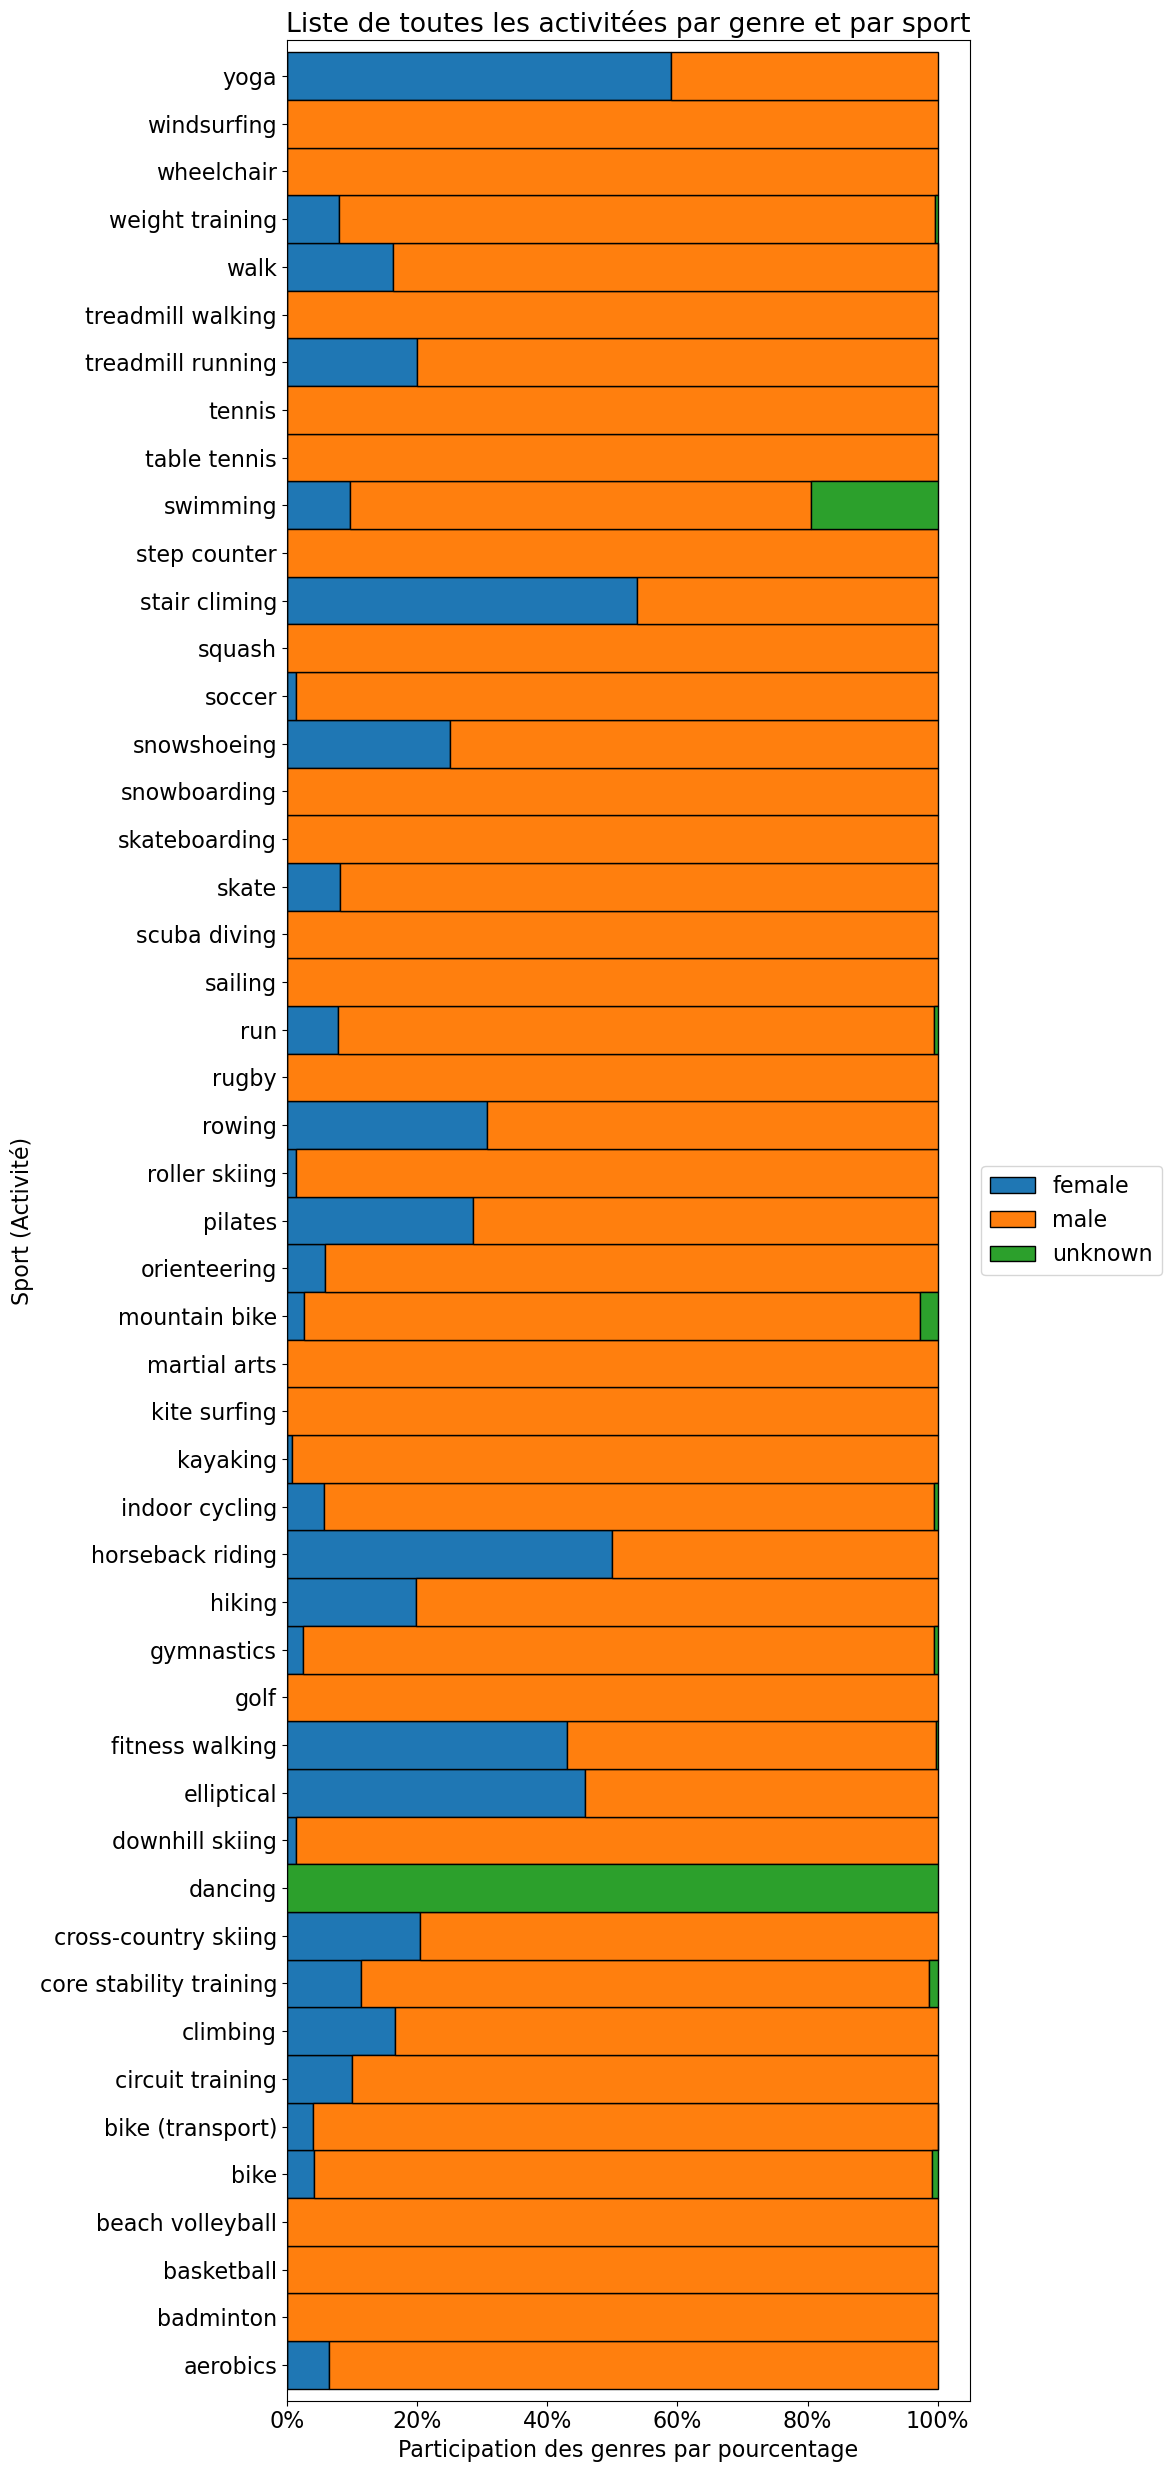

In [66]:
# Obtenir le nombre total d'activités
total_activities = ranked_sport_users_df.count()
print(f'Il Y a au total: {total_activities} activitées et voici le graphe pour les activitées basée sur le genre:')

# Ajouter les informations sur les activités en fonction du genre
activities_by_gender = df.groupBy('sport', 'gender').count().toPandas()

# Visualiser les données
fig = plt.figure(figsize=(12, 25))
grid_size = (1, 1)
ax = plt.subplot2grid(grid_size, (0, 0), colspan=1, rowspan=1)

# Remodeler les données en utilisant unstack() et créer un graphique à barres empilées
plot = activities_by_gender.groupby(['sport', 'gender']).agg(np.mean).groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='barh', stacked=True, width=1
                                               , edgecolor='black', ax=ax, title='Liste de toutes les activitées par genre et par sport')

# Configurer les étiquettes et la légende du graphique
ylabel = plt.ylabel('Sport (Activité)')
xlabel = plt.xlabel('Participation des genres par pourcentage')
legend = plt.legend(
    sorted(activities_by_gender['gender'].unique()), loc='center left', bbox_to_anchor=(1.0, 0.5)
)

# Mettre à jour la taille de la police et configurer le format des étiquettes de l'axe des x
param_update = plt.rcParams.update({'font.size': 16})
ax = plt.gca()
formatter = ax.xaxis.set_major_formatter(mtick.PercentFormatter())

# Ajuster l'affichage du graphique et le montrer
a = fig.tight_layout()
plt.show()


Je me demande s'il y'a des utilisateurs qui ont participé à plusieurs sports 

Faison un code qui va extraire les utilisateurs qui ont participé à plus d'un sport. Nous allons ainsi créer un DataFrame avec ces informations, en ajoutant également le genre. Ensuite, calculons les statistiques de base pour ces utilisateurs.

In [67]:
# Sélectionnons les colonnes qui nous interesse et supprimons les doublons
sport_df = df \
    .select(df.userId, df.gender, df.sport) \
    .distinct() \
    .groupBy(df.userId, df.gender) \
    .count()

# Filtrons les utilisateurs ayant participé à plus d'un sport
min_number_of_sports = 1
user_more_sports_df = sport_df \
                    .filter(sport_df["count"] > min_number_of_sports) \
                    .orderBy("count", ascending = False) \
                    .toPandas()

# Renommons les colonnes et calculons les statistiques
user_more_sports_df.rename(columns = {'count':'Sports count'}, inplace = True)
user_more_sports_df.describe().astype(int).T


count     mean      std  min      25%      50%      75%  \
userId          822  4860464  3953412   69  1609606  3730685  7554937   
Sports count    822        3        2    2        2        3        5   

                   max  
userId        15481421  
Sports count        16

D'après le résumé:
- 822/1104 personnes ont participé à plus d'un sport. 
- En moyenne, une personne participe à environ 3 sports, et certaines personnes participent jusqu'à 16 sports !

Maintenant, nous allons examiner les statistiques par genre en utilisant un boxplot :

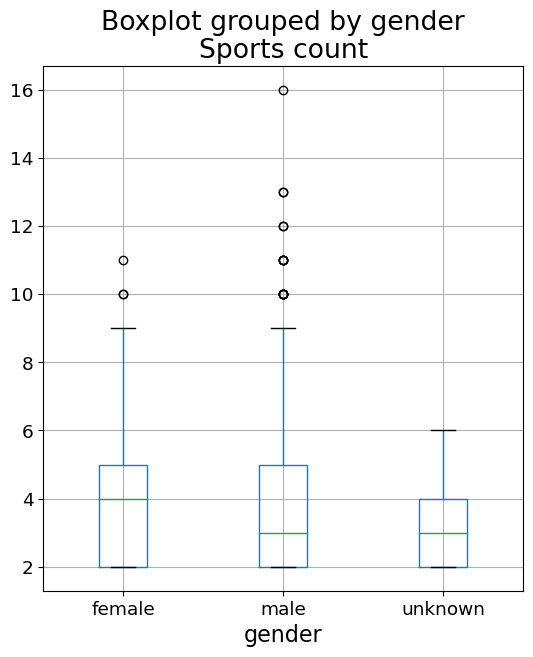

In [68]:
plot = user_more_sports_df.boxplot(column='Sports count', by='gender', fontsize='small', figsize=(6,7))

Le boxplot montre qu'à l'exception des valeurs aberrantes, les hommes et les femmes ont pratiquement la même répartition de la pratique sportive.

In [69]:
# les utilisateurs ayant au moins 10 enregistrements
qualified_df = df \
    .select(df.sport, df.userId, df.gender) \
    .groupBy(df.sport, df.userId, df.gender) \
    .count()
qualified_df = qualified_df.filter(qualified_df["count"] >= 10) \
    .orderBy("count", ascending = False)

# Calculons le nombre d'utilisateurs et le pourcentage par rapport au nombre total d'utilisateurs
print('Nombre d utilisateurs ayant plus de 10 séances d entraînement:')
qualified_pd_df = qualified_df.select("userId", "gender").distinct() \
    .groupBy(qualified_df.gender).count().toPandas()
qualified_pd_df.rename(columns={'count': 'Users count'}, inplace=True)
qualified_pd_df

qualified_users_count = sum(qualified_pd_df['Users count'])
total_users_count = df.select('userId').distinct().count()
qualified_percentage = round((qualified_users_count / total_users_count),2) * 100
print('\nIl y a donc {} / {} utilisateurs qui répondent aux critères des 10 enregistrements historiques, ce qui représente {:.2f}%' \
      .format(qualified_users_count, total_users_count, qualified_percentage)
     )


Nombre d utilisateurs ayant plus de 10 séances d entraînement:


gender  Users count
0  unknown           13
1   female           88
2     male          886


Il y a donc 987 / 1104 utilisateurs qui répondent aux critères des 10 enregistrements historiques, ce qui représente 89.00%


Nous allons maintenant extraire les informations supplémentaires à partir de la colonne timestamp, qui est actuellement au format UNIX timestamp. Pour obtenir plus d'informations à partir de cette colonne, je vais crééer quatre nouvelles colonnes :

- date_time: conversion du timestamp UNIX en format datetime de Python
- duration: durée totale d'une séance d'entraînement, en minutes
- workout_start_time: détermination de l'heure de début d'une séance d'entraînement
- interval: liste des intervalles de temps entre chaque enregistrement timestamp unique dans une séance d'entraînement, en secondes

In [70]:
# On avait sa avant
df.limit(3).toPandas()

altitude gender  \
0  [41.6, 40.6, 40.6, 38.4, 37.0, 34.0, 34.0, 34....   male   
1  [38.4, 39.0, 39.0, 38.2, 36.8, 36.8, 36.8, 35....   male   
2  [76.4, 73.2, 72.4, 73.0, 73.0, 70.8, 69.2, 69....   male   

                                          heart_rate         id  \
0  [100, 111, 120, 119, 120, 116, 125, 128, 131, ...  396826535   
1  [100, 105, 111, 110, 108, 115, 126, 130, 132, ...  392337038   
2  [99, 105, 113, 110, 109, 110, 108, 121, 116, 1...  389643739   

                                            latitude  \
0  [60.173348765820265, 60.173239801079035, 60.17...   
1  [60.173247596248984, 60.17320962622762, 60.172...   
2  [60.17326201312244, 60.173205351457, 60.172969...   

                                           longitude  \
0  [24.64977040886879, 24.65014273300767, 24.6509...   
1  [24.649855233728886, 24.65015547350049, 24.650...   
2  [24.64995657093823, 24.650197718292475, 24.651...   

                                               speed sport  \
0  [6.8652, 16.4736, 19.1988, 20.4804, 31.3956, 3...  bike   
1  [9.0792, 13.284, 15.9336, 10.9476, 16.1676, 30...  bike   
2  [4.0464, 13.8204, 16.9776, 19.9404, 28.7856, 3...  bike   

                                           timestamp  \
0  [1408898746, 1408898754, 1408898765, 140889877...   
1  [1408221682, 1408221687, 1408221699, 140822170...   
2  [1407858459, 1407858466, 1407858478, 140785849...   

                                                 url    userId  \
0  https://www.endomondo.com/users/10921915/worko...  10921915   
1  https://www.endomondo.com/users/10921915/worko...  10921915   
2  https://www.endomondo.com/users/10921915/worko...  10921915   

   PerWorkoutRecordCount  
0                    500  
1                    500  
2                    500

In [71]:
import os
from pyspark.sql import SparkSession

os.environ['PYSPARK_PYTHON'] = 'python'

# Convertir la colonne timestamp en datetime, pour être utilisé ultérieurement avec la fonction .withColumn
def to_time(timestamp_list):
    # Convertir en datetime et soustraire 7 heures en raison de la différence entre la fenêtre de temps Endomondo et l'heure UTC, comme décrit dans les données
    return [datetime.fromtimestamp(t) - timedelta(hours=7) for t in timestamp_list]

# Enregistrer la fonction 'to_time' en tant qu'UDF dans le framework PySpark
udf_to_time = udf(to_time, ArrayType(elementType=TimestampType()))

# Fonction de support pour obtenir la durée (en minutes) d'une liste de valeurs datetime, pour être utilisée ultérieurement avec la fonction withColumn
def get_duration(datetime_list):
    time_dif = max(datetime_list) - min(datetime_list)
    return time_dif.seconds/60

# Enregistrement de la fonction de support 'get_duration' en tant que fonction définie par l'utilisateur dans le framework PySpark
udf_get_duration = udf(get_duration, FloatType())

# Fonction de support pour obtenir l'heure de début d'une séance d'entraînement de la liste datetime, pour être utilisée ultérieurement avec la fonction withColumn
def get_start_time(datetime_list):
    return min(datetime_list)

# Enregistrement de la fonction de support 'get_start_time' en tant que fonction définie par l'utilisateur dans le framework PySpark
udf_get_start_time = udf(get_start_time, TimestampType())

# Fonction de support pour obtenir la liste des intervalles de temps au sein d'une séance d'entraînement
def get_interval(datetime_list):
    if len(datetime_list) == 1:
        return [0]
    else:
        interval_list = []
        for i in range(0, len(datetime_list)-1):
            interval = (datetime_list[i+1] - datetime_list[i]).seconds
            interval_list.append(interval)
        return interval_list

# Enregistrement de la fonction de support 'get_interval' en tant que fonction définie par l'utilisateur dans le framework PySpark    
udf_get_interval = udf(get_interval, ArrayType(elementType=IntegerType()))

# Créer une nouvelle colonne 'date_time' pour convertir les timestamps en format datetime de Python pour une utilisation ultérieure
df = df.withColumn('date_time', 
    udf_to_time('timestamp'))

# Créer une colonne 'workout_start_time' pour obtenir l'heure de début de chaque séance d'entraînement/ligne :
df = df.withColumn('workout_start_time', hour(udf_get_start_time('date_time')))

# Créer une colonne duration à partir de la colonne date_time créée précédemment, en utilisant la fonction UDF udf_get_duration définie ci-dessus
df = df.withColumn('duration', udf_get_duration('date_time'))

# Créer une colonne interval à partir de la colonne date_time, en utilisant la fonction UDF udf_get_interval définie ci-dessus
df = df.withColumn('interval', udf_get_interval('date_time'))


print('Nouvelles colonnes (''date_time'', ''workout_start_time'' en heure, ''duration'' en minutes & ''interval'' en secondes), premières 5 lignes:')
df.select('timestamp','date_time', 'workout_start_time', 'duration', 'interval').limit(5).toPandas()



Nouvelles colonnes (date_time, workout_start_time en heure, duration en minutes & interval en secondes), premières 5 lignes:


timestamp  \
0  [1408898746, 1408898754, 1408898765, 140889877...   
1  [1408221682, 1408221687, 1408221699, 140822170...   
2  [1407858459, 1407858466, 1407858478, 140785849...   
3  [1407432042, 1407432048, 1407432056, 140743206...   
4  [1406909434, 1406909436, 1406909437, 140690943...   

                                           date_time  workout_start_time  \
0  [2014-08-24 11:45:46, 2014-08-24 11:45:54, 201...                  11   
1  [2014-08-16 15:41:22, 2014-08-16 15:41:27, 201...                  15   
2  [2014-08-12 10:47:39, 2014-08-12 10:47:46, 201...                  10   
3  [2014-08-07 12:20:42, 2014-08-07 12:20:48, 201...                  12   
4  [2014-08-01 11:10:34, 2014-08-01 11:10:36, 201...                  11   

     duration                                           interval  
0  126.483330  [8, 11, 13, 16, 6, 23, 16, 23, 29, 23, 24, 24,...  
1   74.000000  [5, 12, 8, 4, 5, 6, 4, 4, 5, 13, 7, 17, 4, 10,...  
2  112.483330  [7, 12, 12, 16, 6, 7, 16, 11, 19, 13, 17, 11, ...  
3   75.316666  [6, 8, 9, 4, 13, 4, 3, 4, 13, 10, 13, 13, 7, 1...  
4   22.616667  [2, 1, 1, 3, 2, 1, 4, 2, 1, 2, 1, 1, 2, 4, 4, ...

In [72]:
print('\nLet''s look at the statistics of the new duration column (in minutes):')
df.select('duration').toPandas().describe().T


Lets look at the statistics of the new duration column (in minutes):


count       mean        std  min        25%        50%  \
duration  253020.0  84.476044  98.013321  0.0  32.166668  58.916668   

                 75%          max  
duration  102.737497  1439.966675

In [73]:
# Fonction d'assistance pour échantillonner les données
def sampling_data(max_users_per_gender, max_workouts_per_sport):
    '''
        max_users_per_gender: nombre maximum d'utilisateurs à sélectionner aléatoirement par sexe
        max_workouts_per_sport: nombre maximum d'activités à sélectionner par sport
        (les sports existant chez les utilisateurs sélectionnés)
    '''
    # Obtenir la liste unique des userId et des genres, à des fins d'échantillonnage
    users_genders = df.select('userId', 'gender').distinct().toPandas()
    
    # Utiliser la fonction 'sample' pour choisir jusqu'à 3 userId par genre à partir de la liste unique des userId
    random_x_users_per_gender = users_genders.groupby('gender')['userId'].apply(
                lambda s: s.sample(min(len(s), max_users_per_gender))
    )

    # Appliquer un filtre sur le DataFrame principal de PySpark pour l'échantillonnage
    samples_by_gender = df.where(df.userId.isin(list(random_x_users_per_gender)))

    # Ensuite, générer la liste unique des identifiants d'activité et des types de sport à partir de l'ensemble de données échantillonnées
    workout_sports = samples_by_gender.select('id', 'sport').distinct().toPandas()
    
    # Utiliser la fonction 'sample' pour choisir jusqu'à 10 identifiants d'activité pour chaque type de sport
    random_y_workouts_per_sport = workout_sports.groupby('sport')['id'].apply(
        lambda s: s.sample(min(len(s), max_workouts_per_sport))
    )

    # Appliquer un filtre à l'ensemble de données échantillonnées pour continuer à réduire le nombre d'entraînements par type d'activité
    samples_by_gender_and_sport = samples_by_gender.where(df.id.isin(list(random_y_workouts_per_sport)))
    
    return samples_by_gender_and_sport


In [74]:
# Utiliser 2 variables pour déterminer les critères d'échantillonnage :
# nombre maximum d'utilisateurs par genre et nombre maximum d'entraînements par sport
max_users_per_gender, max_workouts_per_sport = 20, 15

# Récupérer l'ensemble de données échantillonnées dans un DataFrame Pandas pour être utilisé avec les fonctionnalités de tracé
pd_df = sampling_data(max_users_per_gender, max_workouts_per_sport).toPandas()
print('\nAperçu des données échantillonnées (uniquement les colonnes de chaînes de caractères et numériques):')
pd_df.head()



Aperçu des données échantillonnées (uniquement les colonnes de chaînes de caractères et numériques):


altitude   gender  \
0  [4.6, 4.6, 4.2, 4.6, 4.6, 4.4, 3.8, 3.8, 3.6, ...     male   
1  [0.6, 2.8, 5.8, 6.4, 7.6, 11.0, 14.2, 18.2, 23...     male   
2  [22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22....  unknown   
3  [24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24....  unknown   
4  [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...  unknown   

                                          heart_rate         id  \
0  [129, 129, 131, 133, 134, 136, 137, 137, 138, ...  481250766   
1  [99, 109, 123, 130, 135, 136, 139, 140, 142, 1...  448093418   
2  [101, 101, 107, 109, 108, 108, 118, 112, 116, ...  207627385   
3  [110, 111, 113, 125, 125, 125, 125, 128, 128, ...  192347811   
4  [142, 142, 142, 141, 141, 139, 141, 141, 142, ...  185927692   

                                            latitude  \
0  [55.673367474228144, 55.67341960966587, 55.673...   
1  [55.663546063005924, 55.66339770331979, 55.663...   
2  [55.7182168, 55.7182387, 55.7182278, 55.718224...   
3  [55.7150777, 55.7150624, 55.715034, 55.7150266...   
4  [55.7183382, 55.7183334, 55.7183339, 55.718285...   

                                           longitude  \
0  [12.526753703132272, 12.526790415868163, 12.52...   
1  [12.6054628752172, 12.605814663693309, 12.6062...   
2  [11.7109849, 11.7110111, 11.710983, 11.7109692...   
3  [11.7268508, 11.7268733, 11.7269617, 11.727010...   
4  [11.710853, 11.7108594, 11.710882, 11.710952, ...   

                                               speed                    sport  \
0  [6.6852, 7.6572, 11.9916, 12.4272, 12.3624, 12...                      run   
1  [8.1612, 12.7656, 11.8584, 13.4028, 14.31, 13....                      run   
2                                               None  core stability training   
3                                               None  core stability training   
4                                               None          weight training   

                                           timestamp  \
0  [1425604234, 1425604236, 1425604238, 142560424...   
1  [1418587957, 1418587965, 1418587974, 141858798...   
2  [1370453421, 1370453427, 1370453440, 137045345...   
3  [1367946752, 1367946754, 1367946756, 136794675...   
4  [1367281842, 1367281844, 1367281847, 136728185...   

                                                 url   userId  \
0  https://www.endomondo.com/users/885462/workout...   885462   
1  https://www.endomondo.com/users/885462/workout...   885462   
2  https://www.endomondo.com/users/9613679/workou...  9613679   
3  https://www.endomondo.com/users/9613679/workou...  9613679   
4  https://www.endomondo.com/users/9613679/workou...  9613679   

   PerWorkoutRecordCount                                          date_time  \
0                    500  [2015-03-05 19:10:34, 2015-03-05 19:10:36, 201...   
1                    500  [2014-12-14 14:12:37, 2014-12-14 14:12:45, 201...   
2                    500  [2013-06-05 12:30:21, 2013-06-05 12:30:27, 201...   
3                    434  [2013-05-07 12:12:32, 2013-05-07 12:12:34, 201...   
4                    500  [2013-04-29 19:30:42, 2013-04-29 19:30:44, 201...   

   workout_start_time    duration  \
0                  19   20.216667   
1                  14   74.500000   
2                  12  123.449997   
3                  12   34.083332   
4                  19   60.966667   

                                            interval  
0  [2, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, ...  
1  [8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...  
2  [6, 13, 17, 20, 10, 14, 14, 10, 7, 6, 9, 16, 1...  
3  [2, 2, 1, 1, 2, 5, 1, 2, 1, 2, 3, 1, 1, 1, 1, ...  
4  [2, 3, 7, 10, 9, 9, 3, 10, 9, 10, 6, 4, 11, 11...

Nouvelle heure normalisée (premières 7 lignes) :


userId                    sport  \
0   885462                      run   
1   885462                      run   
2  9613679  core stability training   
3  9613679  core stability training   
4  9613679          weight training   
5  9613679  core stability training   
6  9613679  core stability training   

                                           date_time  \
0  [2015-03-05 19:10:34, 2015-03-05 19:10:36, 201...   
1  [2014-12-14 14:12:37, 2014-12-14 14:12:45, 201...   
2  [2013-06-05 12:30:21, 2013-06-05 12:30:27, 201...   
3  [2013-05-07 12:12:32, 2013-05-07 12:12:34, 201...   
4  [2013-04-29 19:30:42, 2013-04-29 19:30:44, 201...   
5  [2013-04-16 12:42:43, 2013-04-16 12:42:48, 201...   
6  [2013-04-03 17:09:17, 2013-04-03 17:09:18, 201...   

                                normalized_date_time  
0  [0, 2, 4, 7, 9, 12, 14, 16, 19, 21, 24, 26, 29...  
1  [0, 8, 17, 26, 35, 44, 53, 62, 71, 80, 89, 98,...  
2  [0, 6, 19, 36, 56, 66, 80, 94, 104, 111, 117, ...  
3  [0, 2, 4, 5, 6, 8, 13, 14, 16, 17, 19, 22, 23,...  
4  [0, 2, 5, 12, 22, 31, 40, 43, 53, 62, 72, 78, ...  
5  [0, 5, 13, 24, 28, 34, 42, 49, 55, 61, 65, 67,...  
6  [0, 1, 9, 17, 20, 28, 37, 45, 60, 64, 66, 76, ...


Tracer la fréquence cardiaque brute (échantillonnée) en fonction du temps normalisé :


C:\Users\oumar\AppData\Local\Temp\ipykernel_33536\27498068.py:54: UserWarning:

FixedFormatter should only be used together with FixedLocator



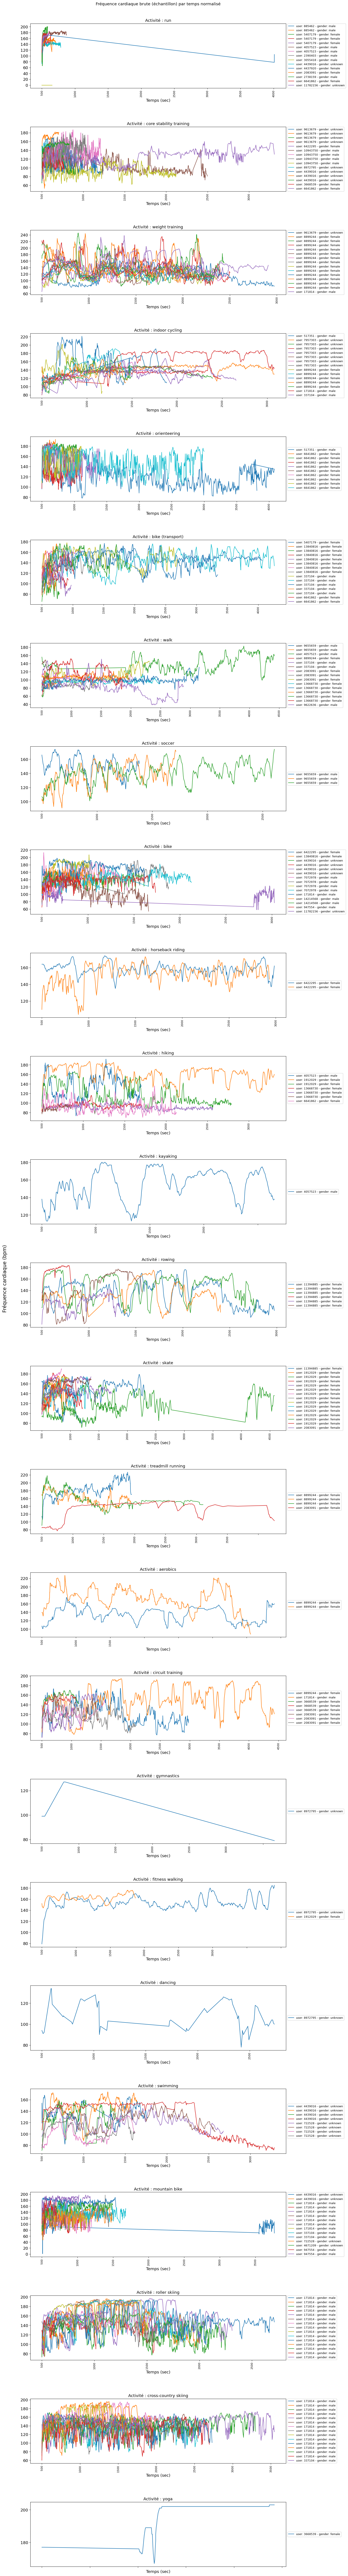

In [75]:
# Fonction lambda pour aplatir une liste de listes en une seule grande liste
flattern = lambda l: set([item for sublist in l for item in sublist])

# liste vide pour stocker les heures normalisées
normalized_datetime_list = []

# Parcour chaque ligne des données échantillonnées (chaque séance d'entraînement)
for index, data_row in pd_df.iterrows():
    # l'heure la plus ancienne (min_date_time) pour chaque séance d'entraînement
    min_date_time = min(data_row['date_time'])
    
    # Soustrayez min_date_time de chaque heure dans la séance d'entraînement
    # pour normaliser les heures (les faire commencer à 0)
    normalized_datetime_list.append(
        [(date_time - min_date_time).seconds for date_time in data_row['date_time']]
    )

# Ajoute les heures normalisées à l'ensemble de données sous la colonne 'normalized_date_time'
pd_df['normalized_date_time'] = normalized_datetime_list

print('Nouvelle heure normalisée (premières 7 lignes) :')
pd_df.head(7)[['userId', 'sport', 'date_time', 'normalized_date_time']]

print('\nTracer la fréquence cardiaque brute (échantillonnée) en fonction du temps normalisé :')

# Obtient la liste unique des sports dans l'ensemble de données échantillonnées
sport_list = pd_df['sport'].unique()

# Crée un graphique pour chaque sport
fig, axs = plt.subplots(len(sport_list), figsize=(15, 6 * len(sport_list)))
subplot_adj = fig.subplots_adjust(hspace=0.6)
plot_setp = plt.setp(axs, yticks=range(0, 250, 20))

# Pour chaque sport de la liste
for sport_index, sport in enumerate(sport_list):
    # on va filtre les données pour n'inclure que les séances d'entraînement pour ce sport
    workout = pd_df[pd_df.sport == sport]
    
    # temps maximum (en secondes) par sport
    max_time = max(flattern(workout.normalized_date_time))

    for workout_index, data_row in workout.iterrows():
        # Crée un label pour le tracé comprenant l'ID de l'utilisateur et le genre
        label = 'user: ' + str(data_row['userId']) + ' - gender: ' + data_row['gender']
        
        # Trace la fréquence cardiaque en fonction du temps normalisé pour chaque séance d'entraînement
        plot_i = axs[sport_index].plot(
            data_row['normalized_date_time'], data_row['heart_rate'], label=label
        )
    
    # Définis le titre, les étiquettes des axes et la légende pour chaque graphique
    title_i = axs[sport_index].set_title('Activité : ' + sport, fontsize='small')
    xlabel_i = axs[sport_index].set_xlabel('Temps (sec)', fontsize='small')
    xsticklabels_i = axs[sport_index].set_xticklabels(
        range(0, max_time, 500), rotation='vertical', fontsize=9
    )
    ysticklabels_i = axs[sport_index].set_yticklabels(range(0, 250, 20), fontsize='small')
    
    # Ajoute une légende pour chaque tracé, en indiquant l'utilisateur et le genre
    legend_i = axs[sport_index].legend(
        loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size': 9}
    )

# Ajoute un label pour l'axe des y sur le côté gauche de la figure
x_label = fig.text(0.04, 0.5, 'Fréquence cardiaque (bpm)', va='center', rotation='vertical')

# Ajoute un titre général pour l'ensemble de la figure
chart_title = fig.text(0.5, 1.3, 'Fréquence cardiaque brute (échantillon) par temps normalisé', 
            ha='center', va='center', fontsize='small', transform=axs[0].transAxes)


In [76]:
# Génére un ensemble de données plus petit avec 2 utilisateurs par sexe et 2 séances d'entraînement par sport.
pd_df_small = sampling_data(max_users_per_gender=2, max_workouts_per_sport=2).toPandas()
print('Sampled data (2 user, 2 workouts per sport):')
pd_df_small[['userId', 'gender', 'sport', 'id', 'workout_start_time',
             'PerWorkoutRecordCount', 'duration', 'longitude', 'latitude', 'altitude']].describe()


Sampled data (2 user, 2 workouts per sport):


userId            id  workout_start_time  PerWorkoutRecordCount  \
count  1.400000e+01  1.400000e+01           14.000000              14.000000   
mean   3.795583e+06  4.609001e+08           10.714286             276.642857   
std    1.294515e+06  1.245452e+08            3.473605             207.319748   
min    2.636715e+06  2.885792e+08            7.000000              42.000000   
25%    2.636715e+06  3.407148e+08            9.000000              73.000000   
50%    3.961631e+06  4.798582e+08            9.500000             195.000000   
75%    3.961631e+06  5.598445e+08           11.000000             500.000000   
max    7.551966e+06  6.386475e+08           18.000000             500.000000   

         duration  
count   14.000000  
mean    63.905956  
std    104.002510  
min      2.750000  
25%     11.166667  
50%     30.141666  
75%     54.079166  
max    400.766663

Plot workout path in 3D graphs per each workout:


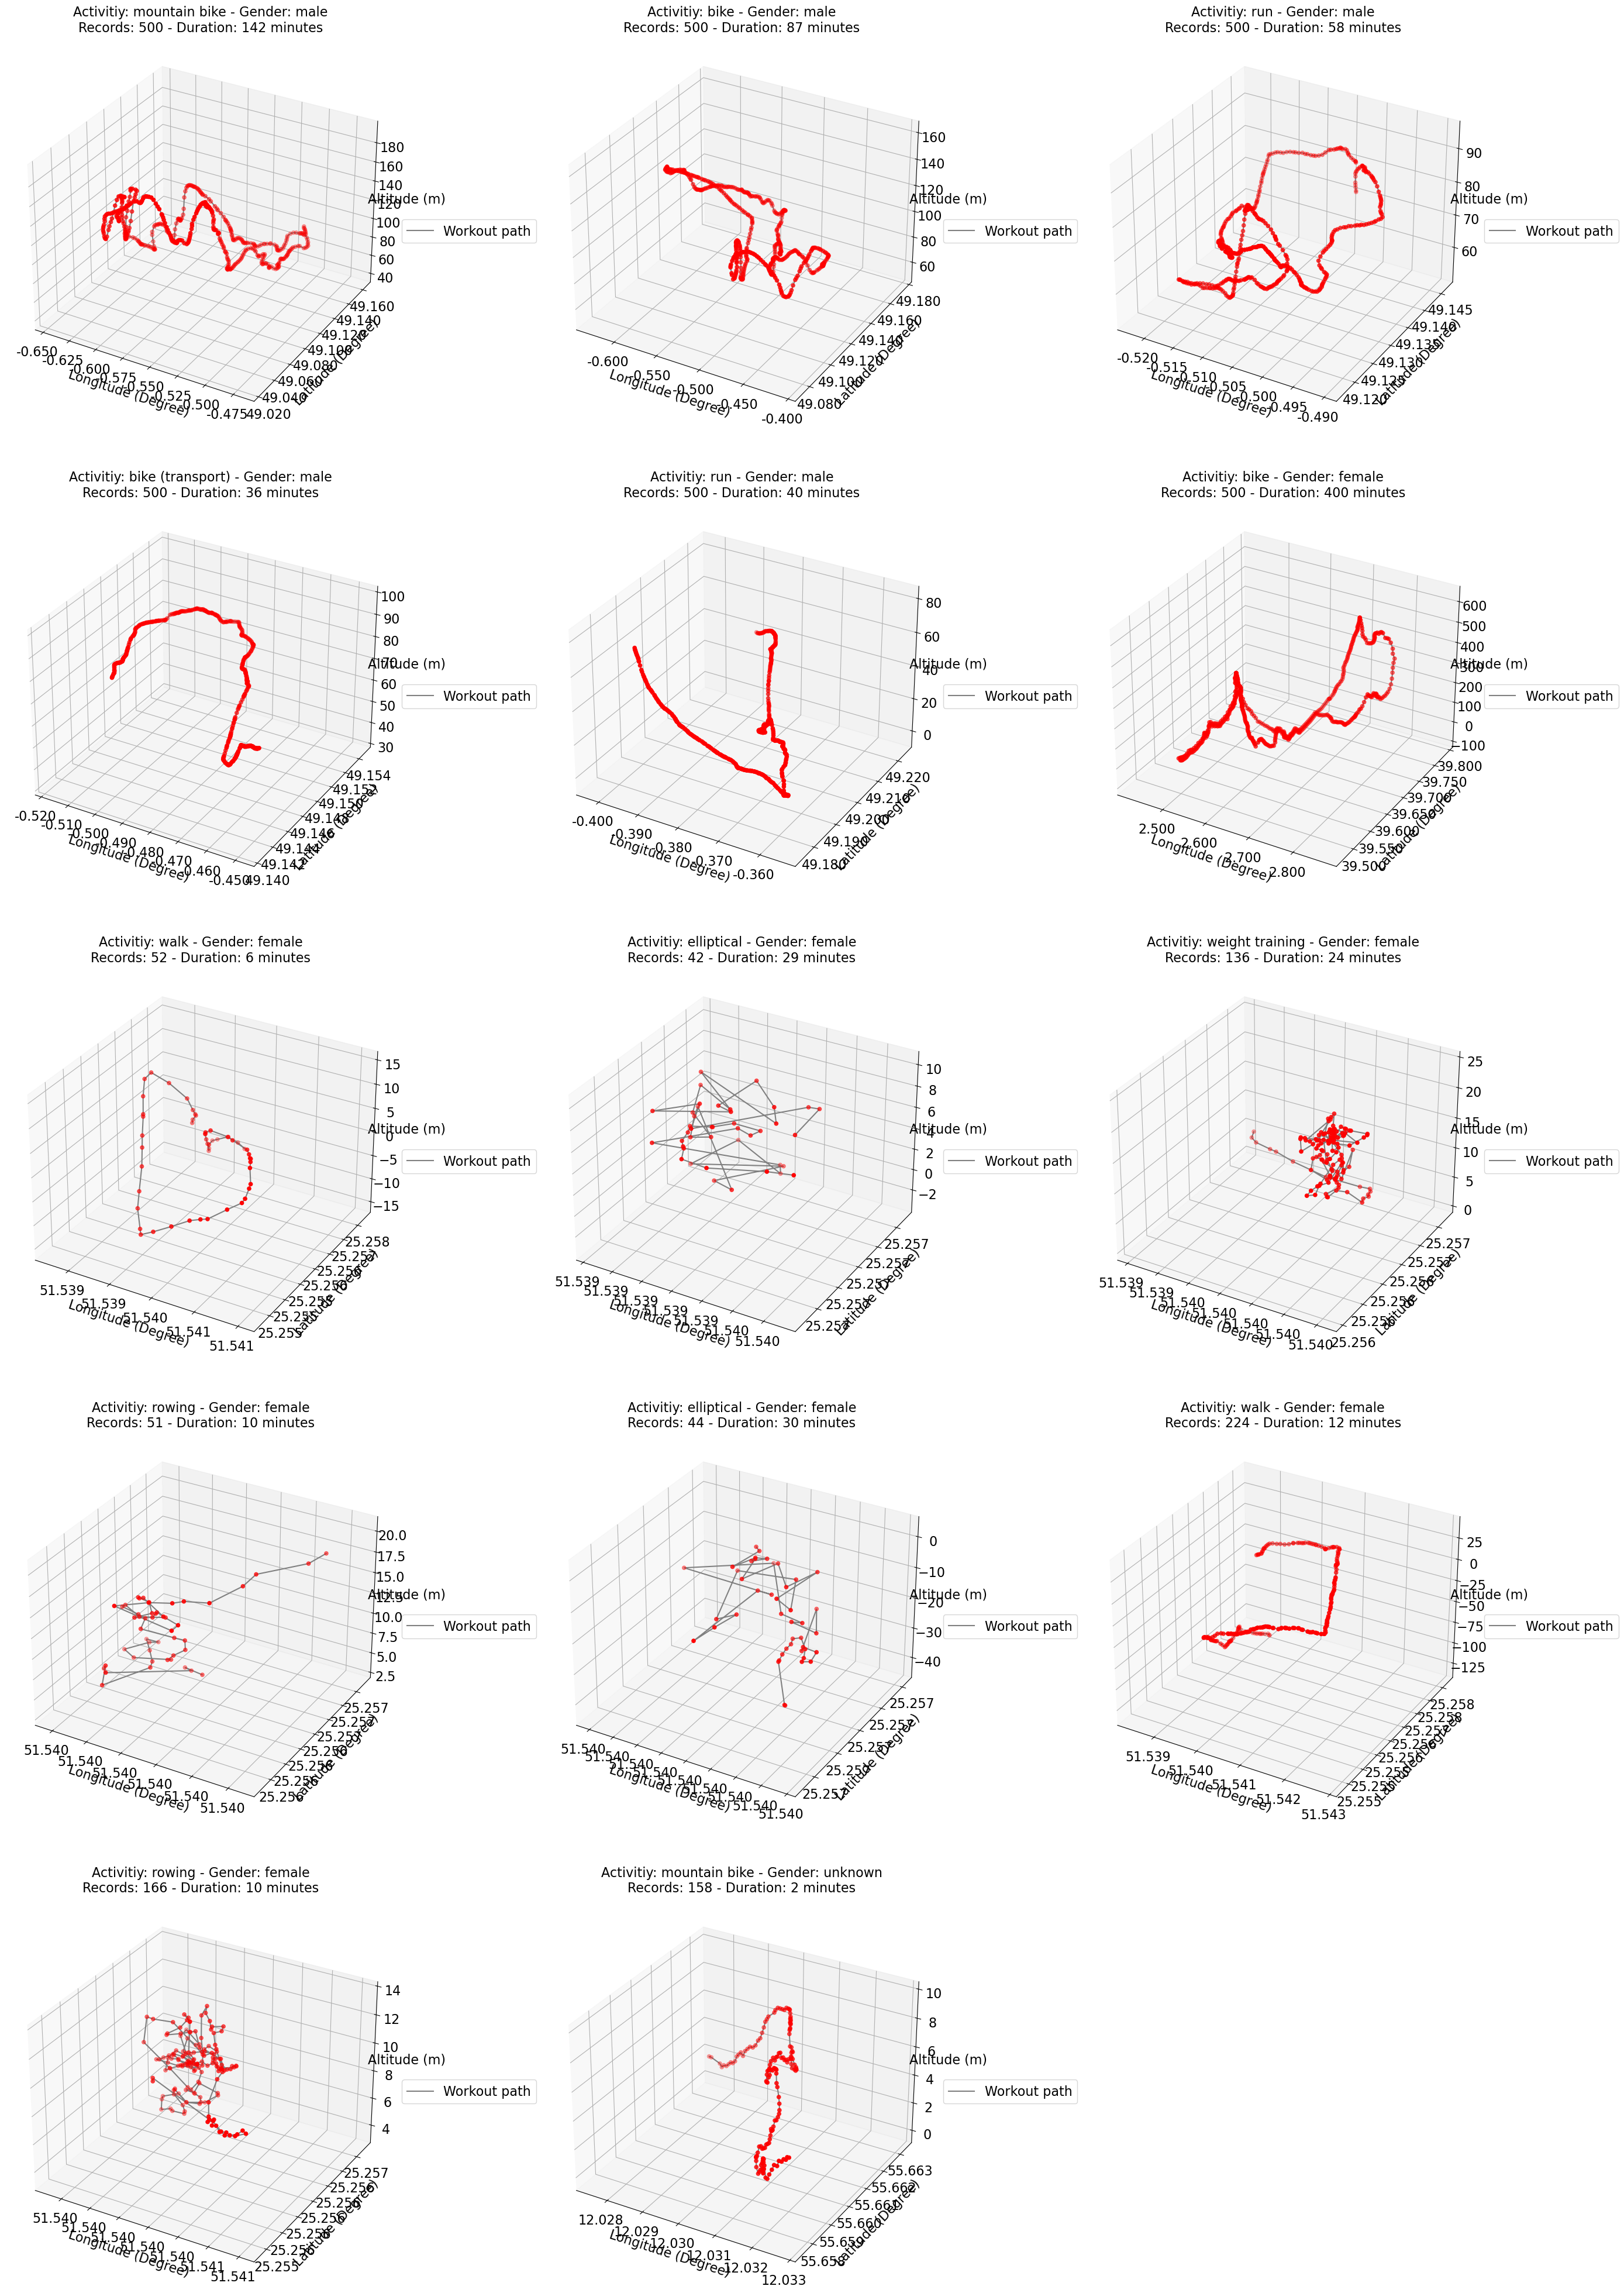

In [77]:
def get_fixed_mins_maxs(mins, maxs):
    deltas = (maxs - mins) / 12.
    mins = mins + deltas / 4.
    maxs = maxs - deltas / 4.

    return [mins, maxs]

# Détermine le nombre de séances d'entraînement et la mise en page de la figure
workout_count = pd_df_small.shape[0]
ncols = 3
nrows = math.ceil(workout_count/ncols)

fig = plt.figure(figsize=(8 * (ncols + 0.5), 8*nrows))

a = fig.subplots_adjust(hspace = 0.2, wspace=0.5)

print('Graphe stylé en 3D:')

for row_index, row in pd_df_small.iterrows():
    # Calculer les limites pour chaque axe (longitude, latitude, altitude)
    minmax_long = get_fixed_mins_maxs(min(row['longitude']) - stats.stdev(row['longitude']), max(row['longitude']) + stats.stdev(row['longitude']))
    minmax_lat = get_fixed_mins_maxs(min(row['latitude']) - stats.stdev(row['latitude']), max(row['latitude']) + stats.stdev(row['latitude']))
    minmax_alt = get_fixed_mins_maxs(min(row['altitude']) - stats.stdev(row['altitude']), max(row['altitude']) + stats.stdev(row['altitude']))
    
    # Créer un graphique 3D et tracer le chemin de l'entraînement
    ax = fig.add_subplot(nrows, ncols, row_index + 1, projection='3d')
    title = 'Activitiy: ' + row['sport'] + ' - Gender: ' + row['gender'] + '\nRecords: ' + str(int(row['PerWorkoutRecordCount'])) + ' - Duration: ' + str(int(row['duration'])) + ' minutes'
    title = ax.set_title(title, fontsize=16)
    scatter = ax.scatter(row['longitude'], row['latitude'], row['altitude'], c='r', marker='o')
    plot = ax.plot3D(row['longitude'], row['latitude'], row['altitude'], c='gray', label='Workout path')
    
    # Configurer les étiquettes et les limites des axes
    x_label = ax.set_xlabel('Longitude (Degree)', fontsize=16)
    y_label = ax.set_ylabel('Latitude (Degree)', fontsize=16)
    z_label = ax.set_zlabel('Altitude (m)', fontsize=16, rotation = 0)
    for t in ax.xaxis.get_major_ticks(): font_size = t.label.set_fontsize(16)
    for t in ax.yaxis.get_major_ticks(): font_size = t.label.set_fontsize(16)
    for t in ax.zaxis.get_major_ticks(): font_size = t.label.set_fontsize(16)
    legend = ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    ax.zaxis.set_rotate_label(False)
    plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
    plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
    ax.pbaspect = [4, 2, 0.5]
    xlims = ax.set_xlim(minmax_long)
    ylims = ax.set_ylim(minmax_lat)
    # Certaines activités n'ont pas de changement d'altitude, vérifier avant de définir les limites de l'axe z
    if minmax_alt[0] != minmax_alt[1]: zlims = ax.set_zlim(minmax_alt)

    # active tight_layout pour le graphique 3D :
    for spine in ax.spines.values():
        b = spine.set_visible(False)
plt.rcParams['legend.fontsize'] = 16
a = plt.tight_layout()
plt.show()
   
